An example for the task of Music Structure Analysis.

Find more details about the principle of the method in [1], and about the segmentation algorithm in [2].

References:

[1] Marmoret, A., Cohen, J. E., & Bimbot, F. (2022). "Barwise Compression Schemes for Audio-Based Music Structure Analysis." Sound and Music Computing 2022. 2022.

[2] Marmoret, A., Cohen, J. E., & Bimbot, F. (2023). Barwise Music Structure Analysis with the Correlation Block-Matching Segmentation Algorithm. Transactions of the International Society for Music Information Retrieval (TISMIR), 6(1), 167-185.


In [1]:
# Define the dataloaders
import nmf_audio_benchmark.dataloaders.music.msa_dataloader as msa_dl
# Define the task
import nmf_audio_benchmark.tasks.music.msa as msa
# Define the algorithm
import nmf_audio_benchmark.algorithms.nn_fac_algos as nn_fac_algos

# Plotting functions
from nmf_audio_benchmark.utils.common_plot import *

In [2]:
# Path to the dataset
datapath = '/home/a23marmo/datasets/rwcpop' 

# Instanciate the dataset object
dataset_object = msa_dl.RWCPopDataloader
dataset = dataset_object(datapath=datapath, feature = "nn_log_mel", cache_path = f"{datapath}/cache", download=False)

# Select one song
track_id, bars, barwise_tf_matrix, annotations_intervals = dataset[17]

INFO: NumExpr defaulting to 6 threads.


Computing NMF...
NMF done


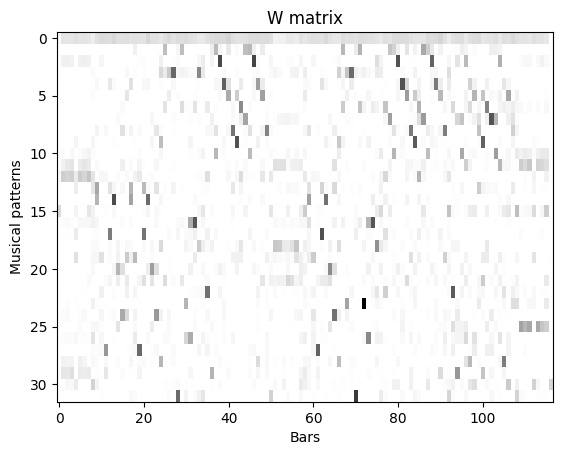

In [3]:
# Instanciate the NMF object
nmf = nn_fac_algos.nn_fac_NMF(32, beta=1, init = "nndsvd", nmf_type="unconstrained", normalize=[False, True])

print("Computing NMF...")
# Compute NMF
W, H = nmf.run(data=barwise_tf_matrix, feature_object = dataset.feature_object) # the feature object is useless if the init is not set to "harmonic"

print("NMF done")

# Plots the W matrix, representing the barwise representation of the song according to the musical patterns (defined in H)
plot_me_this_spectrogram(W.T, title="W matrix", x_axis="Bars", y_axis="Musical patterns")

In [4]:
# Instanciate the segmentation algorithm object
segmentation_algorithm = msa.CBMEstimator(similarity_function="cosine", penalty_weight=0, penalty_func="modulo8", bands_number=7)

# Predict the segments
segments_estimated = segmentation_algorithm.predict_in_seconds(W, bars)

# Compute the scores
tol_05, tol_3 = segmentation_algorithm.score(segments_estimated, annotations_intervals)
print(f"F measure with 0.5s tolerance: {tol_05[2]}, and with 3s tolerance: {tol_3[2]}")

F measure with 0.5s tolerance: 0.5853658536585366, and with 3s tolerance: 0.8292682926829269
